# Clustering Algorithm
Clustering or cluster analysis is a technique that allows us to find groups of similar objects. A group of similar object consisted of objects that are more related to each other than to objects in other groups.

There are three categories of clustering:
1. Prototype-based
    1. K-means
- Hierarchical
- Density-based

## Prototype-based
- K-means algorithm

Each cluster is represented by a prototype:
- __centroid__ (average) of similar points for contiunous features
- __medoid__ (the most representative or most frequently occuring point) in the case of categorical feature.

Evaluation:
- elbow
- silhoutte plot

### K-means clustering

Let's generate some data to studies. In sklearn, you can use a module [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) to generate isotropic Gaussian blobs for clustering.

k-means algorithm steps:
1. Specified $k$ and randomly pick $k$ centroids from the sample points as initial cluster centers.
- Assign each sample to the nearest centroid $\mu^{(j)},  j \in {1,\ldots,k}$.
- Move the centroid to the center of the samples that were assigned to it.
- Repeat the steps 2 and 3 until the cluster assignment do not change or a user-defined tolerance or a maximum number of iterations is reached.

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
X, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

In [18]:
X[0:10,:]

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192]])

In [19]:
y[0:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0])

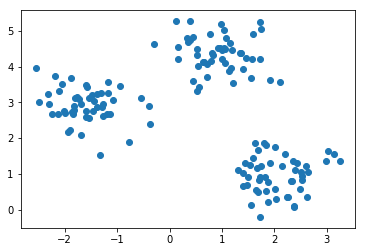

In [20]:
plt.scatter(X[:,0], X[:,1])

In real-world clustering problem, we don't have the ground truth category (`y`); otherwise the problem would become supervised learning.

Use squared euclidean distance to get the step 2. The problem become: minimizing the **within-cluster sum of squared errors (SSE)**

$$SSE=\sum_{n=1}^{n}\sum_{j=1}^k w^{(i,j)} \lvert x^{(i)}  - \mu^{(j)}\rvert_2^2$$

In step 2, I have to calculate the squared euclidean distance between each point to each centroid. Then assign each point to the closest centroid (to the centroid that has the smallest distance with that point). If i have 3 clusters and 150 points, i have to do 3*150 operations to know the distance between each point to each centroid and 150 operations to assign each point to the 3 classes. You should also calculate the overall SSE that we gonna minimize

In step 3, I have to calculate the mean of each variable within each cluster to get the center of the cluster and then move the centroid location to that center. For example i have 3 centroid and each centroid already have points that has been assigned to them (as a cluster). For each cluster, I have to calculate the mean for each variable. If i have 2 variables (2D); $x_1$ and $x_2$, then I have the mean of both of them for each cluster, for example $\overline{x_1}^{(1)}$ is the mean of $x_1$ in cluster 1 etc. We will call this as center of the cluster. Then move the centroid to that center coordinate.


### Problems with k-means:
1. You have to determine the number of cluster
- You have to determine the maximum number of iterations because it is possible that k-means does not reach converegence.
- The initial centroid position can affect the clustering results


To address the third problem, we can run k-means several time with different random intial centroid and choose the best in terms of the SSE

IT is important to standardize all the variable.

### Elbow plot
Problem with k-means no 1, we have to determine the number of cluster. But we sometimes don't know especially when the dimension of the data is more than 2-d. In that case, how do we gonna quantify the quality of the clustering model? As before, we can use withing-cluster SSE. In sklearn kmeans model, we can plot the SSE of different number of k. Intuitively we can say that if k increases, the SSE (distortion) will decrease. The idea behind elbow is to find the value of k where the distortion begins to increase more rapidly.

### Silhouette plot
This is also talking about evaluating the quality of clustering model. Silhouette can be applied to other than k-means. It is a measure of how tightly grouped the samples in the cluster are.

We need to find the silhoutte value $s$ for each sample. From these value of $s$, we can see whether our model is optimal or suboptimal


### But I still didn't get the idea how this work in categorical variables.
Medoid. How?? Isn't it just very very obvious? if I have 10 example, with 5 category A and 5 category B. Well I can just cluster them into 2, right? Why do i need to include medoid?

## Hierarchical clustering
Advantages:
- allows to plot __dendograms__. Dendogram can be used to help the interpretation of the results. How? By creating meaningful taxonomies. & cool __heatmap__
- We don't need to specify the number of cluster.

Two categories:
- Agglomerative hierarchical clustering
- Divisive hierarchical clustering

### Agglomerative hierarchical clustring
- single linkage
- complete linkage

Steps:
1. Compute the distance matrix of all samples
- Represent each datapoints as singleton cluster.
- Merge the two closest clusters based on the distance of the most dissimilar (distant) member.
- Update the similarity matrix
- Repeat steps 2 to 4 until one single cluster remain.

## Density-based clustering. DBSCAN
REALLY IMPORTANT

Advantage:
- does not assume that the cluster have a sperical shape as in k-means
- does not necessarily assign each point to a cluster but is capable of removing noise points.

Steps:
1. Each point has to be labelled as:
    - core point: at leas a specified number (MinPts) of neighboring points fall within the specified radius $\epsilon$
    - border point: point that has fewer neighbors than MinPts within $\epsilon$, but lies within $\epsilon$ radius of a core point
    - noise point: all other than core or border
2. Form a separate cluster for each core point or a connected group of core point (core points are connected if they are no farther away than $\epsilon$)
3. Assign each border point to the cluster of its corresponding core point.



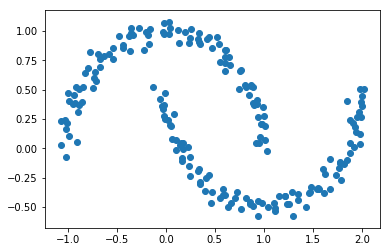

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

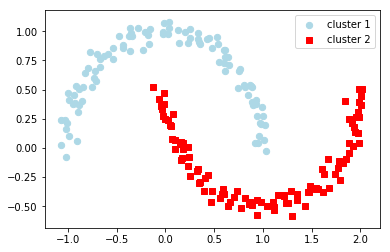

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
plt.legend()
plt.show()